In [2]:
df = pd.read_csv('nike_data_13-09-2023.csv')

In [3]:
df.head(2)

,Unnamed: 0,Rating,Review Date,Location,Username,Review,Fit Feedback,Comfort Feedback,Recommend Feedback,title,IsPromoReview,subtitle,colorDescription,fullPrice,discounted,employeePrice,currentPrice,isLaunch,pid,label
0,0,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,Women's Shoes,Lucky Green/White/Aquatone,110,True,53.38,88.97,False,1010048667,IN_STOCK
1,1,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,Men's Shoes,Palomino/White/Wild Berry,110,True,49.78,82.97,False,1003842468,IN_STOCK


## Data Cleaning and Preparation

In [4]:
df.shape

(4587, 20)

In [5]:
# Step 1: Rename columns
df = df.rename(columns={
    'Unnamed: 0': 'Review No.',
    'title': 'Product Line',
    'pid': 'Product ID',
    'subtitle': 'Category',
    'colorDescription': 'Color(s)',
    'label': 'BestSeller'
})

# Step 2: Reorder columns
new_order = [
    'Review No.', 'Product ID', 'Product Line', 'Color(s)', 'Category',
    'Rating', 'Location', 'Fit Feedback', 'Comfort Feedback', 'Recommend Feedback', 
    'IsPromoReview', 'fullPrice', 'discounted', 'currentPrice', 'employeePrice', 
    'isLaunch', 'Username', 'Review', 'Review Date', 'BestSeller'
]
df = df[new_order]

In [6]:
df.head(2)

,Review No.,Product ID,Product Line,Color(s),Category,Rating,Location,Fit Feedback,Comfort Feedback,Recommend Feedback,IsPromoReview,fullPrice,discounted,currentPrice,employeePrice,isLaunch,Username,Review,Review Date,BestSeller
0,0,1010048667,Air Jordan 1 Low,Lucky Green/White/Aquatone,Women's Shoes,5.0,US,True to Size,Very Comfortable,Yes,False,110,True,88.97,53.38,False,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,"Sep 8, 2023",IN_STOCK
1,1,1003842468,Air Jordan 1 Low,Palomino/White/Wild Berry,Men's Shoes,5.0,US,True to Size,Very Comfortable,Yes,False,110,True,82.97,49.78,False,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,"Sep 8, 2023",IN_STOCK


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4587 entries, 0 to 4586
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Review No.          4587 non-null   int64  
 1   Product ID          4587 non-null   int64  
 2   Product Line        4587 non-null   object 
 3   Color(s)            4587 non-null   object 
 4   Category            4587 non-null   object 
 5   Rating              4550 non-null   float64
 6   Location            3011 non-null   object 
 7   Fit Feedback        407 non-null    object 
 8   Comfort Feedback    407 non-null    object 
 9   Recommend Feedback  407 non-null    object 
 10  IsPromoReview       4587 non-null   bool   
 11  fullPrice           4587 non-null   int64  
 12  discounted          4587 non-null   bool   
 13  currentPrice        4587 non-null   float64
 14  employeePrice       4587 non-null   float64
 15  isLaunch            4587 non-null   bool   
 16  Userna

In [8]:
df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')

In [9]:
df['BestSeller'] = df['BestSeller'].str.strip().str.upper()
df['BestSeller'] = df['BestSeller'].map({'BEST_SELLER': True, 'IN_STOCK': False})

In [10]:
def sniff_df(df):
    info = pd.DataFrame()
    info['data type'] = df.dtypes
    info['percentage of missing values'] = df.isnull().sum()/len(df) * 100
    info['No. of unique values'] = df.apply(lambda x: x.nunique())
    info['Unique values'] = df.apply(lambda x: x.unique())
    return info.sort_values('data type')

In [11]:
sniff_df(df)

,data type,percentage of missing values,No. of unique values,Unique values
BestSeller,bool,0.000000,2,"[False, True]"
isLaunch,bool,0.000000,1,[False]
discounted,bool,0.000000,2,"[True, False]"
IsPromoReview,bool,0.000000,2,"[False, True]"
fullPrice,int64,0.000000,11,"[110, 90, 105, 125, 100, 130, 185, 28, 140, 13..."
Review Date,datetime64[ns],0.806627,116,"[2023-09-08T00:00:00.000000000, 2023-09-07T00:..."
Review No.,int64,0.000000,4587,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Product ID,int64,0.000000,18,"[1010048667, 1003842468, 1012365345, 101236534..."
Rating,float64,0.806627,5,"[5.0, 4.0, nan, 3.0, 1.0, 2.0]"
currentPrice,float64,0.000000,14,"[88.97, 82.97, 110.0, 90.0, 105.0, 100.97, 125..."


In [12]:
df['Review'].nunique()

201

In [13]:
reviews_count = df['Review'].value_counts()

to_cap = reviews_count[reviews_count > 10].index

df['repeat_count'] = df.groupby('Review').cumcount()

df = df[~((df['Review'].isin(to_cap)) & (df['repeat_count'] >= 10))]

df.drop(columns=['repeat_count'], inplace=True)

In [14]:
df.shape

(1255, 20)

In [15]:
sniff_df(df)

,data type,percentage of missing values,No. of unique values,Unique values
BestSeller,bool,0.000000,2,"[False, True]"
isLaunch,bool,0.000000,1,[False]
discounted,bool,0.000000,2,"[True, False]"
IsPromoReview,bool,0.000000,2,"[False, True]"
fullPrice,int64,0.000000,11,"[110, 90, 105, 125, 100, 130, 185, 28, 140, 13..."
Review Date,datetime64[ns],0.796813,116,"[2023-09-08T00:00:00.000000000, 2023-09-07T00:..."
Review No.,int64,0.000000,1255,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Product ID,int64,0.000000,18,"[1010048667, 1003842468, 1012365345, 101236534..."
Rating,float64,0.796813,5,"[5.0, 4.0, nan, 3.0, 1.0, 2.0]"
currentPrice,float64,0.000000,14,"[88.97, 82.97, 110.0, 90.0, 105.0, 100.97, 125..."


In [16]:
df = df.dropna(subset=['Review Date'])

In [17]:
sniff_df(df)

,data type,percentage of missing values,No. of unique values,Unique values
BestSeller,bool,0.000000,2,"[False, True]"
isLaunch,bool,0.000000,1,[False]
discounted,bool,0.000000,2,"[True, False]"
IsPromoReview,bool,0.000000,2,"[False, True]"
fullPrice,int64,0.000000,11,"[110, 90, 105, 125, 100, 130, 185, 28, 140, 13..."
Review Date,datetime64[ns],0.000000,116,"[2023-09-08T00:00:00.000000000, 2023-09-07T00:..."
Review No.,int64,0.000000,1245,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Product ID,int64,0.000000,18,"[1010048667, 1003842468, 1012365345, 101236534..."
Rating,float64,0.000000,5,"[5.0, 4.0, 3.0, 1.0, 2.0]"
currentPrice,float64,0.000000,14,"[88.97, 82.97, 110.0, 90.0, 105.0, 100.97, 125..."


In [18]:
df = df.drop('isLaunch', axis=1)

In [19]:
df = df.drop('IsPromoReview', axis=1)

In [20]:
df.shape

(1245, 18)

In [21]:
sniff_df(df)

,data type,percentage of missing values,No. of unique values,Unique values
BestSeller,bool,0.000000,2,"[False, True]"
discounted,bool,0.000000,2,"[True, False]"
fullPrice,int64,0.000000,11,"[110, 90, 105, 125, 100, 130, 185, 28, 140, 13..."
Review Date,datetime64[ns],0.000000,116,"[2023-09-08T00:00:00.000000000, 2023-09-07T00:..."
Review No.,int64,0.000000,1245,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Product ID,int64,0.000000,18,"[1010048667, 1003842468, 1012365345, 101236534..."
Rating,float64,0.000000,5,"[5.0, 4.0, 3.0, 1.0, 2.0]"
currentPrice,float64,0.000000,14,"[88.97, 82.97, 110.0, 90.0, 105.0, 100.97, 125..."
employeePrice,float64,0.000000,14,"[53.38, 49.78, 66.0, 54.0, 63.0, 60.58, 75.0, ..."
Location,object,37.429719,74,"[US, Porter, TX, Mobile, AL, nan, Houston, New..."


In [22]:
def update_locations(location):
    if location == 'US' or (isinstance(location, str) and location.strip().endswith(', US')):
        return 'United States'
    elif isinstance(location, str) and location.strip().endswith(', GB'):
        return 'United Kingdom'
    elif location == 'Georgia':
        return 'United States'
    elif isinstance(location, str) and location.strip().endswith(', GE'):
        return 'Georgia'
    return location  
df['Location'] = df['Location'].apply(update_locations)


def map_uk_locations(location):
    uk_cities = ['London', 'Leicester', 'Glasgow'] 
    if location in uk_cities:
        return 'United Kingdom'
    return location  
df['Location'] = df['Location'].apply(map_uk_locations)


def map_canadian_locations(location):
    canadian_provinces = ['YT']
    if not isinstance(location, str):
        return location 
    
    if any(location.endswith(f', {prov}') for prov in canadian_provinces):
        return 'Canada'
    if location in ['YT']:  
        return 'Canada'
    return location  

df['Location'] = df['Location'].apply(map_canadian_locations)


def map_remaining_to_us(location):
    if location not in ['United Kingdom', 'Canada', 'Georgia']:
        return 'United States'
    return location

df['Location'] = df['Location'].apply(map_remaining_to_us)

In [23]:
sniff_df(df)

,data type,percentage of missing values,No. of unique values,Unique values
BestSeller,bool,0.000000,2,"[False, True]"
discounted,bool,0.000000,2,"[True, False]"
fullPrice,int64,0.000000,11,"[110, 90, 105, 125, 100, 130, 185, 28, 140, 13..."
Review Date,datetime64[ns],0.000000,116,"[2023-09-08T00:00:00.000000000, 2023-09-07T00:..."
Review No.,int64,0.000000,1245,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Product ID,int64,0.000000,18,"[1010048667, 1003842468, 1012365345, 101236534..."
Rating,float64,0.000000,5,"[5.0, 4.0, 3.0, 1.0, 2.0]"
currentPrice,float64,0.000000,14,"[88.97, 82.97, 110.0, 90.0, 105.0, 100.97, 125..."
employeePrice,float64,0.000000,14,"[53.38, 49.78, 66.0, 54.0, 63.0, 60.58, 75.0, ..."
Location,object,0.000000,4,"[United States, United Kingdom, Canada, Georgia]"


In [24]:
df['Review'].unique()

array(['Jordan Low 1 The delivery was on time as scheduled. The fit is true to size. Product quality is amazing!! Overall a perfect score of 10!! Manny214Fresh Sep 8, 2023 Location US Size you normally wear 9.5 0 0 Flag',
       'Runs BIG Beautiful shoes, but runs BIG. I’m usually a 8.5M so I ordered a 10W and it was too big. I would definitely order half a size down next time!',
       'I Love the shoes, I definitely recommend.',
       'Love My Low Dunks My 1st Pair Of Low Dunks And I Love Them 😍 Black And Red Are Two Of My Favorite Colors.',
       'Jordan low shoes These shoes met all of our expectations! Bright, fun with that classic Jordan look. My daughter is a college softball coach and these shoes were purchased for her, matching the school colors 💙❤️ we are obsessed !!',
       'Fire AJ1 lows\nThese my friend are impeccable!!! Buttery leather, fire colorway, fast shipping and great fit!!! These AJ1 lows were right on time for the upcoming fall season although they can be worn

In [25]:
df['Review'] = df['Review'].str.strip().str.lower()

def infer_feedback(review, fit_feedback, comfort_feedback, recommend_feedback):

    if pd.isna(fit_feedback):  # Only infer if it's NaN
        if 'runs small' in review or 'runs very small' in review or 'small' in review or 'half size up' in review or 'barely fit' in review:
            fit_feedback = 'Runs Small'
        elif 'runs big' in review or 'too big' in review or 'big' in review or 'sized down' in review or 'runs large' in review or 'little roomy' in review:
            fit_feedback = 'Runs Big'
        elif 'true to size' in review or 'perfect fit' in review or 'fit very well' in review or 'met all of our expectations' in review or 'fit good' in review or 'fit was just right' in review or 'perfect score' in review:
            fit_feedback = 'True to Size'
    
    if pd.isna(comfort_feedback):
        if 'uncomfortable' in review or 'not comfortable' in review or 'least comfortable' in review:
            comfort_feedback = 'Uncomfortable'
        elif 'average' in review or 'not super comfortable' in review or 'comfortable but' in review :  # Explicitly checking for "average"
            comfort_feedback = 'Average'
        elif 'comfortable' in review or 'amazing quality' or 'comfy' in review in review:
            comfort_feedback = 'Very Comfortable'
        else:
            comfort_feedback = 'Average'
        
    
    if pd.isna(recommend_feedback):  
        if 'not recommend' in review or 'would not recommend' in review or 'Would you recommend this product?:No' in review:
            recommend_feedback = 'No'
        elif 'definitely recommend' in review or 'recommend' in review or 'perfect score' in review or 'highly recommend' in review or 'love' in review or 'best' in review:
            recommend_feedback = 'Yes'
        else:
            recommend_feedback = 'No'
    
    return fit_feedback, comfort_feedback, recommend_feedback

df[['Fit Feedback', 'Comfort Feedback', 'Recommend Feedback']] = df.apply(
    lambda row: pd.Series(infer_feedback(row['Review'], row['Fit Feedback'], row['Comfort Feedback'], row['Recommend Feedback'])),
    axis=1
)

In [26]:
sniff_df(df)

,data type,percentage of missing values,No. of unique values,Unique values
BestSeller,bool,0.000000,2,"[False, True]"
discounted,bool,0.000000,2,"[True, False]"
fullPrice,int64,0.000000,11,"[110, 90, 105, 125, 100, 130, 185, 28, 140, 13..."
Review Date,datetime64[ns],0.000000,116,"[2023-09-08T00:00:00.000000000, 2023-09-07T00:..."
Review No.,int64,0.000000,1245,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Product ID,int64,0.000000,18,"[1010048667, 1003842468, 1012365345, 101236534..."
Rating,float64,0.000000,5,"[5.0, 4.0, 3.0, 1.0, 2.0]"
currentPrice,float64,0.000000,14,"[88.97, 82.97, 110.0, 90.0, 105.0, 100.97, 125..."
employeePrice,float64,0.000000,14,"[53.38, 49.78, 66.0, 54.0, 63.0, 60.58, 75.0, ..."
Location,object,0.000000,4,"[United States, United Kingdom, Canada, Georgia]"


In [27]:
df['Fit Feedback'].value_counts()

True to Size    322
Runs Small       87
Runs Big         35
Name: Fit Feedback, dtype: int64

In [28]:
def impute_fit(row):
    if pd.isna(row['Fit Feedback']):
        if row['Comfort Feedback'] == 'Very Comfortable' and row['Recommend Feedback'] == 'Yes':
            return 'True to Size'
        elif row['Comfort Feedback'] in ['Uncomfortable', 'Average'] and row['Recommend Feedback'] == 'No':
            return 'Runs Small'
        else:
            return 'Runs Big'
    return row['Fit Feedback']

df['Fit Feedback'] = df.apply(impute_fit, axis=1)

In [29]:
df['Fit Feedback'].value_counts()

True to Size    724
Runs Big        420
Runs Small      101
Name: Fit Feedback, dtype: int64

In [30]:
sniff_df(df)

,data type,percentage of missing values,No. of unique values,Unique values
BestSeller,bool,0.0,2,"[False, True]"
discounted,bool,0.0,2,"[True, False]"
fullPrice,int64,0.0,11,"[110, 90, 105, 125, 100, 130, 185, 28, 140, 13..."
Review Date,datetime64[ns],0.0,116,"[2023-09-08T00:00:00.000000000, 2023-09-07T00:..."
Review No.,int64,0.0,1245,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Product ID,int64,0.0,18,"[1010048667, 1003842468, 1012365345, 101236534..."
Rating,float64,0.0,5,"[5.0, 4.0, 3.0, 1.0, 2.0]"
currentPrice,float64,0.0,14,"[88.97, 82.97, 110.0, 90.0, 105.0, 100.97, 125..."
employeePrice,float64,0.0,14,"[53.38, 49.78, 66.0, 54.0, 63.0, 60.58, 75.0, ..."
Location,object,0.0,4,"[United States, United Kingdom, Canada, Georgia]"


In [31]:
price_bins = [0, 50, 100, 150, 200]  # Adjust these ranges as needed
price_labels = ['<50', '50-100', '100-150', '150-200']
df['Price Category'] = pd.cut(df['currentPrice'], bins=price_bins, labels=price_labels, right=False)

In [32]:
df.head(2)

,Review No.,Product ID,Product Line,Color(s),Category,Rating,Location,Fit Feedback,Comfort Feedback,Recommend Feedback,fullPrice,discounted,currentPrice,employeePrice,Username,Review,Review Date,BestSeller,Price Category
0,0,1010048667,Air Jordan 1 Low,Lucky Green/White/Aquatone,Women's Shoes,5.0,United States,True to Size,Very Comfortable,Yes,110,True,88.97,53.38,Manny214Fresh,jordan low 1 the delivery was on time as sched...,2023-09-08,False,50-100
1,1,1003842468,Air Jordan 1 Low,Palomino/White/Wild Berry,Men's Shoes,5.0,United States,True to Size,Very Comfortable,Yes,110,True,82.97,49.78,Manny214Fresh,jordan low 1 the delivery was on time as sched...,2023-09-08,False,50-100


In [33]:
df.shape

(1245, 19)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 0 to 4583
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Review No.          1245 non-null   int64         
 1   Product ID          1245 non-null   int64         
 2   Product Line        1245 non-null   object        
 3   Color(s)            1245 non-null   object        
 4   Category            1245 non-null   object        
 5   Rating              1245 non-null   float64       
 6   Location            1245 non-null   object        
 7   Fit Feedback        1245 non-null   object        
 8   Comfort Feedback    1245 non-null   object        
 9   Recommend Feedback  1245 non-null   object        
 10  fullPrice           1245 non-null   int64         
 11  discounted          1245 non-null   bool          
 12  currentPrice        1245 non-null   float64       
 13  employeePrice       1245 non-null   float64     

## EDA

In [35]:
unique_reviews = df['Review'].nunique()
unique_products = df['Product Line'].nunique()
print(f"unique_reviews: {unique_reviews} \nunique products: {unique_products}")

unique_reviews: 200 
unique products: 11


In [36]:
df.describe()

,Review No.,Product ID,Rating,fullPrice,currentPrice,employeePrice
count,1245.000000,1.245000e+03,1245.000000,1245.000000,1245.000000,1245.000000
mean,2094.029719,5.301483e+08,4.762249,110.273896,105.797181,63.477960
std,1605.019036,4.982276e+08,0.632472,34.038346,33.360189,20.016207
min,0.000000,1.014628e+07,1.000000,28.000000,28.000000,16.800000
25%,609.000000,1.278909e+07,5.000000,105.000000,90.000000,54.000000
50%,1135.000000,1.003839e+09,5.000000,125.000000,110.000000,66.000000
75%,3785.000000,1.010117e+09,5.000000,130.000000,130.000000,78.000000
max,4583.000000,1.012365e+09,5.000000,210.000000,168.970000,101.380000


In [37]:
df.head(2)

,Review No.,Product ID,Product Line,Color(s),Category,Rating,Location,Fit Feedback,Comfort Feedback,Recommend Feedback,fullPrice,discounted,currentPrice,employeePrice,Username,Review,Review Date,BestSeller,Price Category
0,0,1010048667,Air Jordan 1 Low,Lucky Green/White/Aquatone,Women's Shoes,5.0,United States,True to Size,Very Comfortable,Yes,110,True,88.97,53.38,Manny214Fresh,jordan low 1 the delivery was on time as sched...,2023-09-08,False,50-100
1,1,1003842468,Air Jordan 1 Low,Palomino/White/Wild Berry,Men's Shoes,5.0,United States,True to Size,Very Comfortable,Yes,110,True,82.97,49.78,Manny214Fresh,jordan low 1 the delivery was on time as sched...,2023-09-08,False,50-100


## Univariate Analysis

### FullPrice distribution

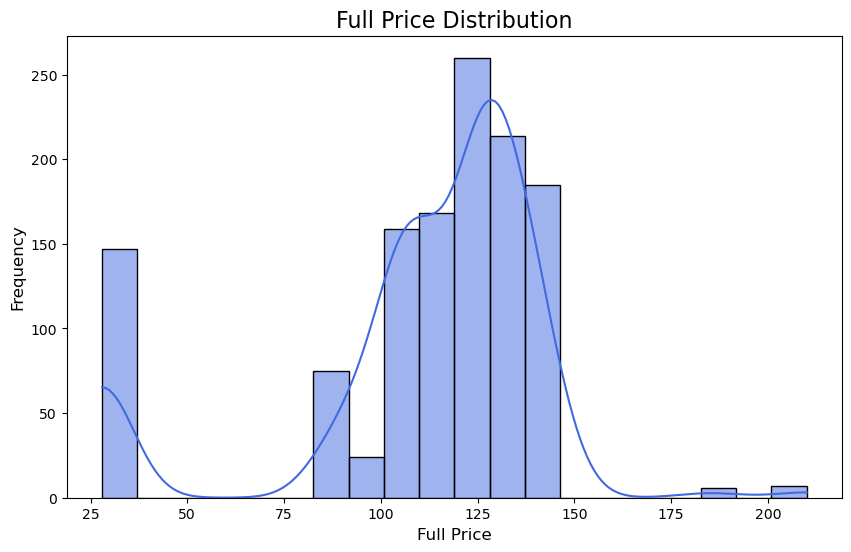

In [38]:
plt.figure(figsize=(10, 6))

sns.histplot(df['fullPrice'], bins=20, kde=True, color='royalblue')


plt.title('Full Price Distribution', fontsize=16)
plt.xlabel('Full Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

### Distibution of colorDescription

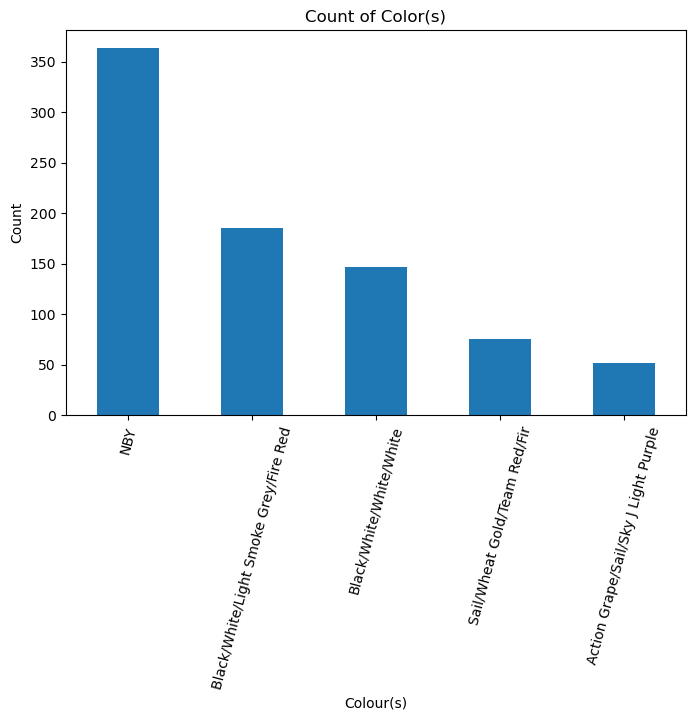

In [39]:
review_counts_color = df['Color(s)'].value_counts().head(5)
review_counts_color.plot(kind='bar', title='Count of Color(s)', figsize=(8, 5))
plt.ylabel('Count')
plt.xlabel('Colour(s)')
plt.xticks(rotation = 75)
plt.show()

### Distributon of different feedback

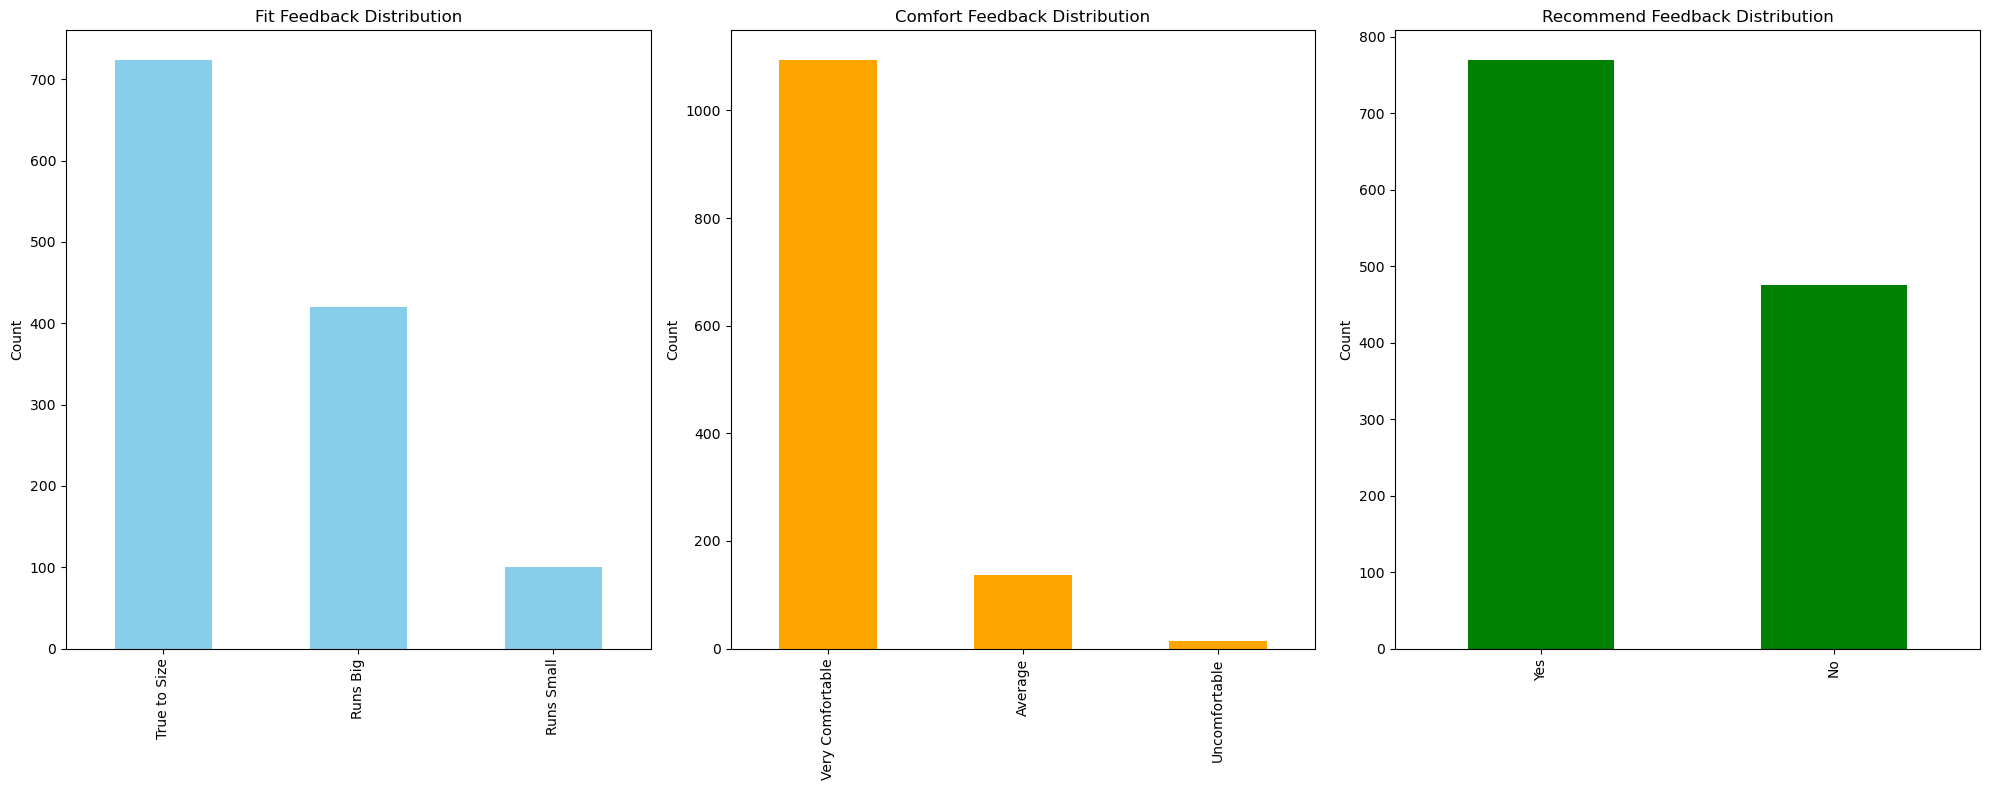

In [40]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
fit_feedback_count = df['Fit Feedback'].value_counts()
fit_feedback_count.plot(kind='bar', color='skyblue', title='Fit Feedback Distribution')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
comfort_feedback_count = df['Comfort Feedback'].value_counts()
comfort_feedback_count.plot(kind='bar', color='orange', title='Comfort Feedback Distribution')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
recommend_feedback_count = df['Recommend Feedback'].value_counts()
recommend_feedback_count.plot(kind='bar', color='green', title='Recommend Feedback Distribution')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Review count by category

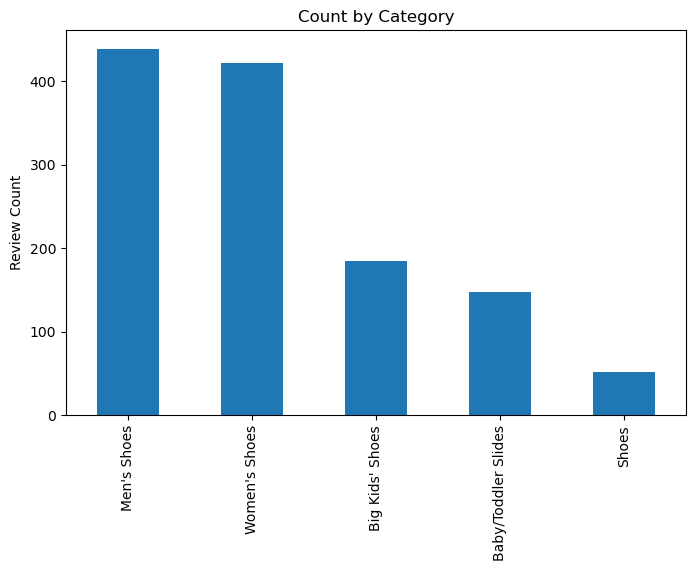

In [41]:
review_counts_category = df['Category'].value_counts()
review_counts_category.plot(kind='bar', title='Count by Category', figsize=(8, 5))
plt.ylabel('Review Count')
plt.show()

### Products with highest number of reviews

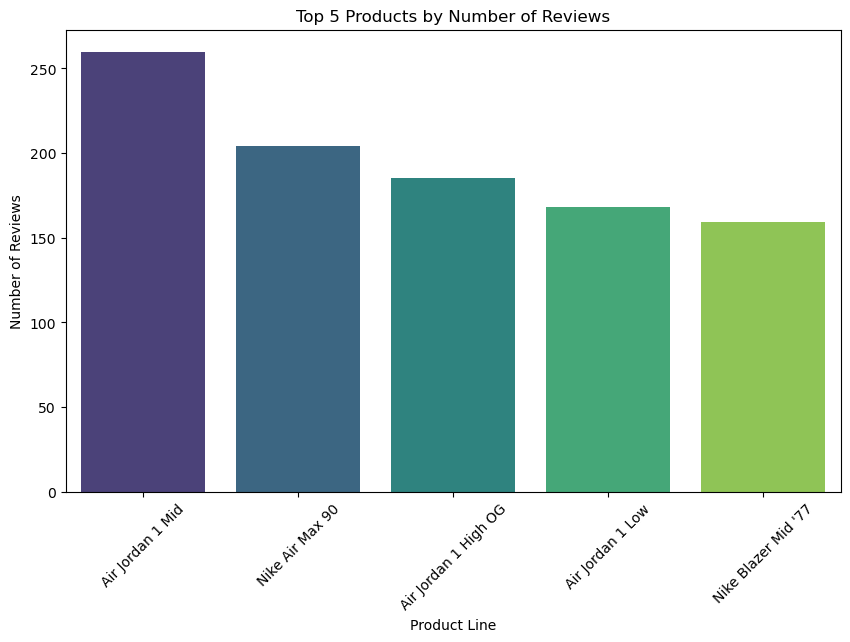

In [42]:
top_products_by_reviews = df.groupby('Product Line')['Review'].count().reset_index()

top_products_by_reviews = top_products_by_reviews.sort_values(by='Review', ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x='Product Line', y='Review', data=top_products_by_reviews, palette='viridis')
plt.title('Top 5 Products by Number of Reviews')
plt.xlabel('Product Line')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

## Bivariate Analysis

### Recommendation Feedback Count of top 5 Product Lines

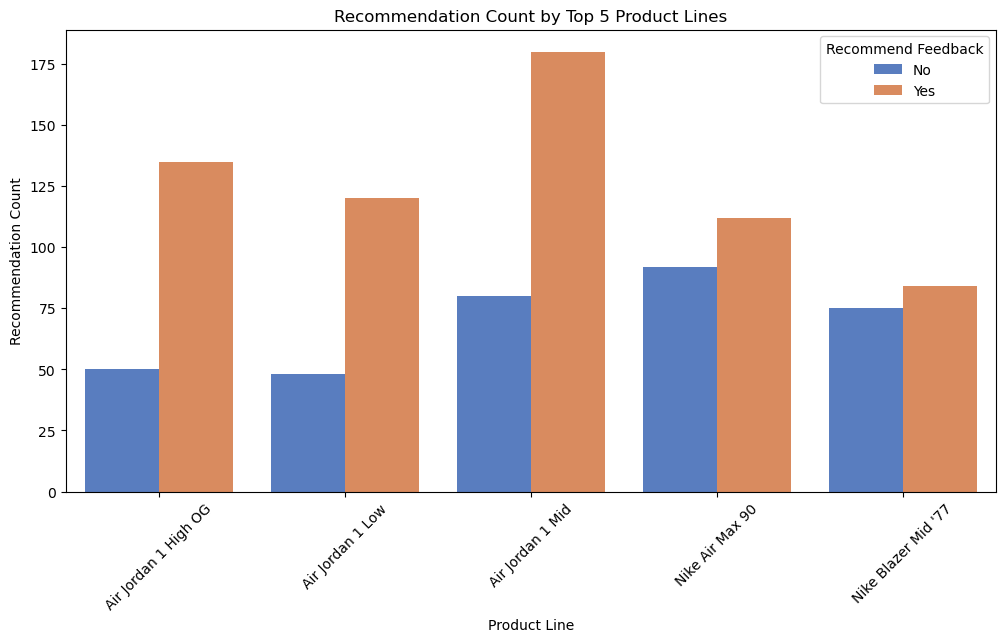

In [43]:
recommend_count_by_category = df.groupby(['Product Line', 'Recommend Feedback']).size().reset_index(name='Count')

top_5_product_lines = recommend_count_by_category.groupby('Product Line')['Count'].sum().nlargest(5).index

top_5_data = recommend_count_by_category[recommend_count_by_category['Product Line'].isin(top_5_product_lines)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Product Line', y='Count', hue='Recommend Feedback', data=top_5_data, palette='muted')

plt.title('Recommendation Count by Top 5 Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Recommendation Count')
plt.xticks(rotation=45)  
plt.show()

### BestSeller by Price Category

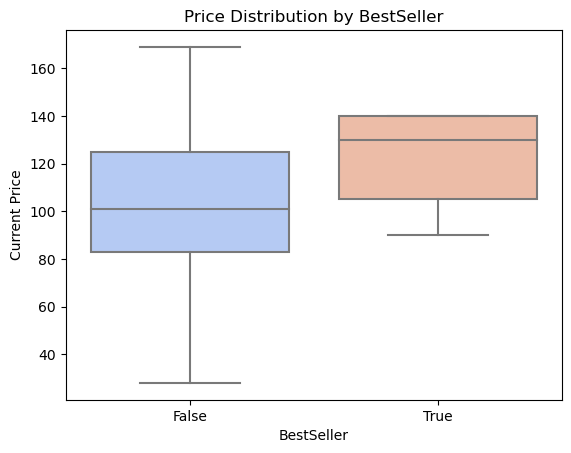

In [44]:
sns.boxplot(data=df, x='BestSeller', y='currentPrice', palette='coolwarm')
plt.title('Price Distribution by BestSeller')
plt.xlabel('BestSeller')
plt.ylabel('Current Price')
plt.show()

### Fit Feedback by Price Category

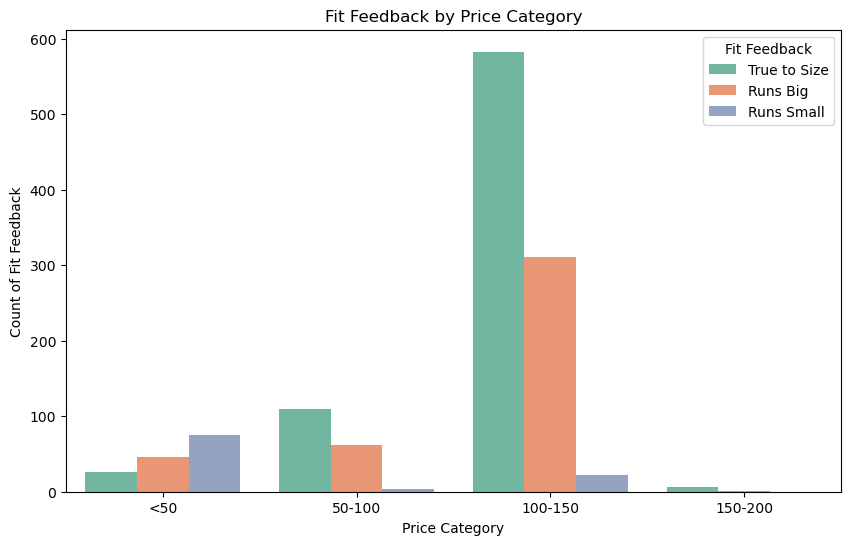

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x='Price Category', hue='Fit Feedback', data=df, palette='Set2')
plt.title('Fit Feedback by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Count of Fit Feedback')
plt.show()

### Recommendation Proportions by Price Category

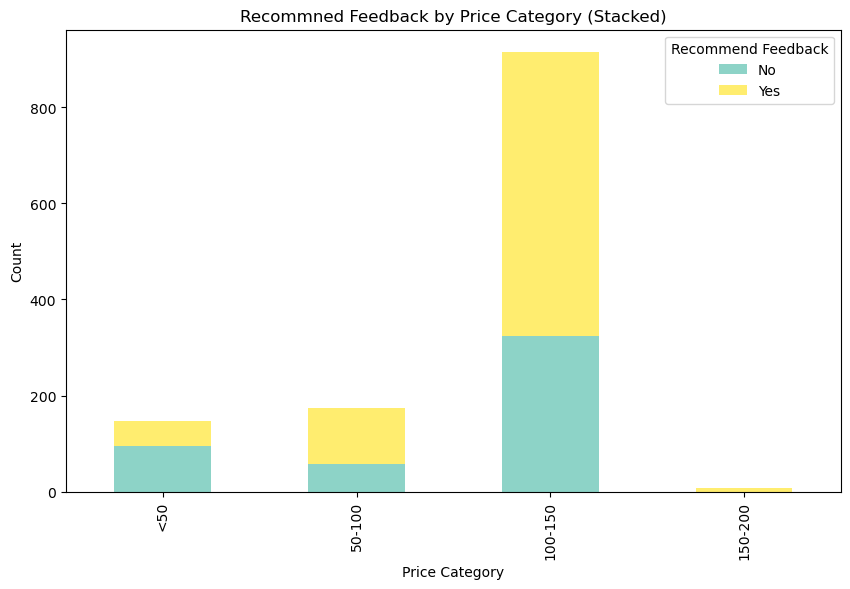

In [46]:
fit_feedback_price = df.pivot_table(index='Price Category', columns='Recommend Feedback', aggfunc='size', fill_value=0)

# Plot the stacked bar chart
fit_feedback_price.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Recommned Feedback by Price Category (Stacked)')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.legend(title='Recommend Feedback', labels=['No', 'Yes'])
plt.show()

### Comfort Feedback Vs Fit Feedback

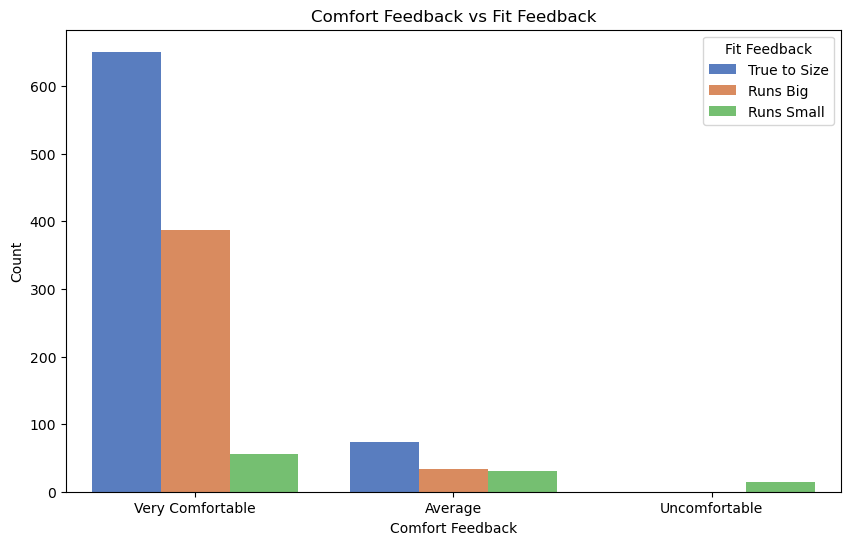

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(x='Comfort Feedback', hue='Fit Feedback', data=df, palette='muted')
plt.title('Comfort Feedback vs Fit Feedback')
plt.xlabel('Comfort Feedback')
plt.ylabel('Count')
plt.show()

### Multivariate Analysis

C:\Users\khadk\AppData\Local\Temp\ipykernel_45148\1544376185.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


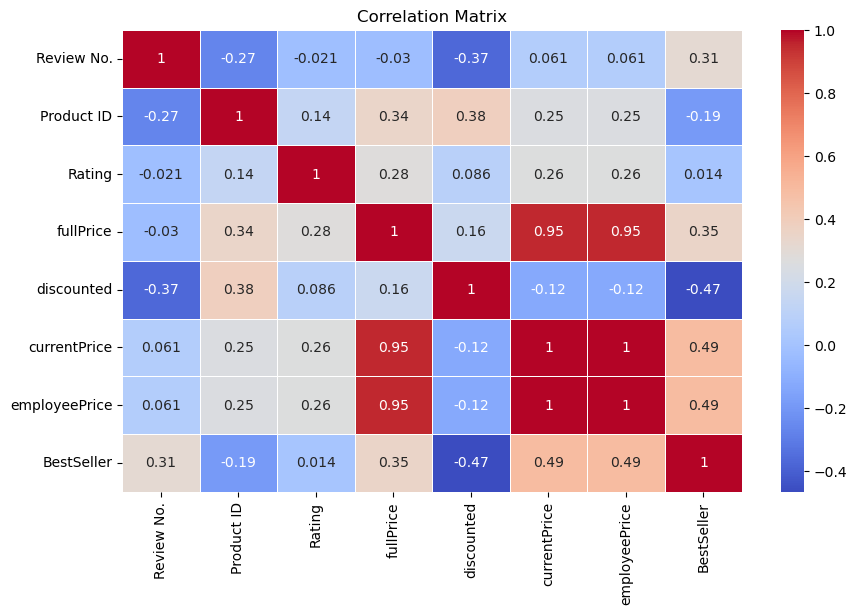

In [48]:
plt.figure(figsize=(10,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [49]:
df['Fit Feedback'] = df['Fit Feedback'].map({'True to Size': 1, 'Runs Big': 2, 'Runs Small': 3, 'No Feedback': 0})
df['Comfort Feedback'] = df['Comfort Feedback'].map({'Very Comfortable': 2, 'Average': 1, 'Uncomfortable': 0})
df['Recommend Feedback'] = df['Recommend Feedback'].map({'Yes': 1, 'No': 0})


C:\Users\khadk\AppData\Local\Temp\ipykernel_45148\1544376185.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


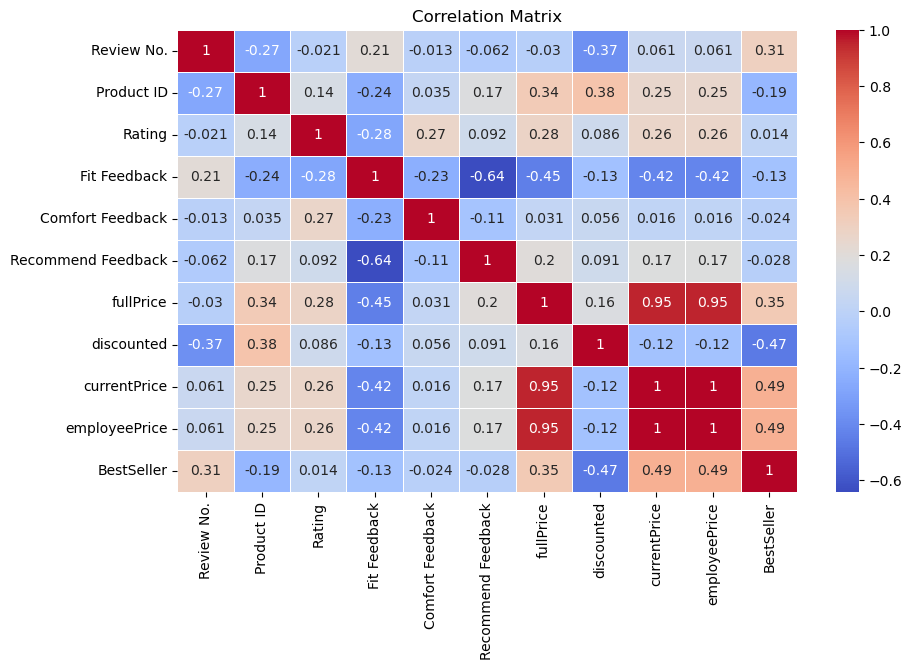

In [50]:
plt.figure(figsize=(10,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Sentiment Analysis on Text Reviews

In [51]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.polarity

df['Sentiment_Polarity'] = df['Review'].apply(get_sentiment)

In [52]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    if pd.isnull(text):
        return None
    scores = analyzer.polarity_scores(text)
    return scores['compound'] 

df['VADER_Sentiment'] = df['Review'].apply(vader_sentiment)

In [53]:
df.sample(2)

,Review No.,Product ID,Product Line,Color(s),Category,Rating,Location,Fit Feedback,Comfort Feedback,Recommend Feedback,fullPrice,discounted,currentPrice,employeePrice,Username,Review,Review Date,BestSeller,Price Category,Sentiment_Polarity,VADER_Sentiment
3280,3280,12789093,Nike Air Max 90,NBY,Men's Shoes,5.0,United States,2,2,0,130,False,130.0,78.0,1,nice shoes\ncomfortable and stylish. haven’t p...,2020-04-21,True,100-150,0.374306,0.9231
3767,3767,12725118,Nike Kawa,Black/White/White/White,Baby/Toddler Slides,5.0,United States,1,2,1,28,False,28.0,16.8,Prettyriy,"great shoes\n i love the shoes , super afforda...",2023-08-10,False,<50,0.481667,0.9477


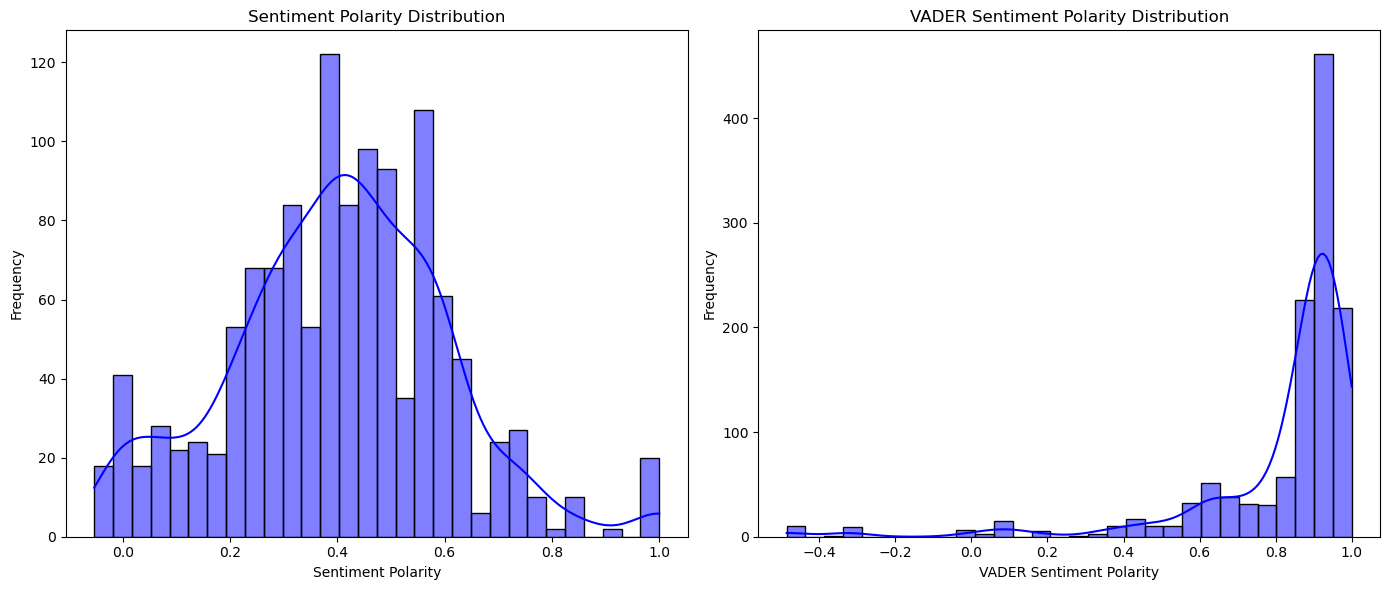

In [54]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Sentiment_Polarity'], bins=30, kde=True, color='blue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['VADER_Sentiment'], bins=30, kde=True, color='blue')
plt.title('VADER Sentiment Polarity Distribution')
plt.xlabel('VADER Sentiment Polarity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Correlation between Sentiment Polarity and fullPrice:
                  VADER_Sentiment  fullPrice
VADER_Sentiment         1.000000   0.209731
fullPrice               0.209731   1.000000


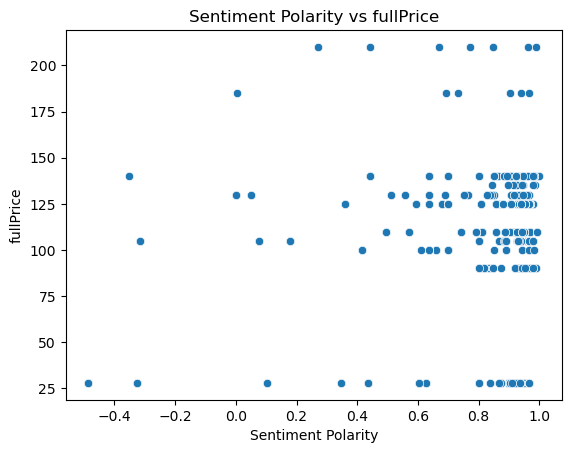

In [55]:
correlation = df[['VADER_Sentiment', 'fullPrice']].corr()
print("Correlation between Sentiment Polarity and fullPrice:\n", correlation)

# Scatter plot of sentiment polarity vs ratings
sns.scatterplot(x='VADER_Sentiment', y='fullPrice', data=df)
plt.title('Sentiment Polarity vs fullPrice')
plt.xlabel('Sentiment Polarity')
plt.ylabel('fullPrice')
plt.show()

C:\Users\khadk\AppData\Local\Temp\ipykernel_45148\1544376185.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


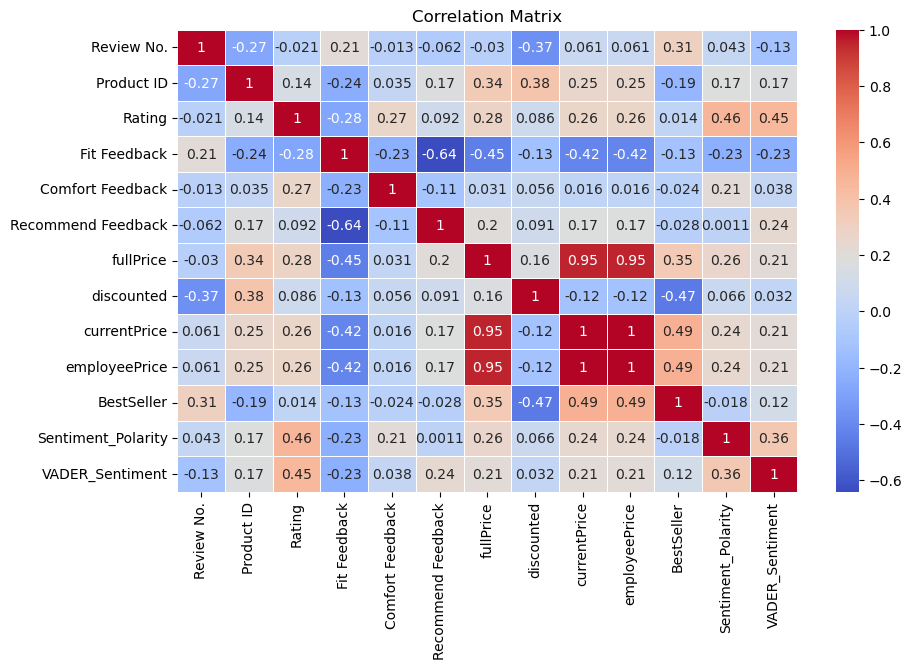

In [56]:
plt.figure(figsize=(10,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Product Recommendation System

In [57]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split


features = df[['currentPrice', 'fullPrice', 'Rating','Comfort Feedback', 'BestSeller','Fit Feedback', 'Category', 'Color(s)','Sentiment_Polarity', 'VADER_Sentiment']]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['currentPrice', 'Rating','Sentiment_Polarity', 'BestSeller', 'fullPrice', 'Comfort Feedback', 'Fit Feedback', 'VADER_Sentiment']),
        ('cat', OneHotEncoder(), ['Category', 'Color(s)'])
    ])

features_transformed = preprocessor.fit_transform(features)

print(features_transformed.shape)

X_train, X_test = train_test_split(features_transformed, test_size=0.2, random_state=42)

cosine_sim_train = cosine_similarity(X_train, X_train)


(1245, 30)


In [58]:
df = df.reset_index(drop=True)

In [59]:
def get_recommendations(product_id, cosine_sim, top_n=10, similarity_threshold=0.1):
    idx = df[df['Product ID'] == product_id].index[0]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [score for score in sim_scores if score[1] >= similarity_threshold and df.iloc[score[0]]['Product ID'] != product_id]
    
    if len(sim_scores) < top_n:
        top_n = len(sim_scores)
    
    sim_scores = sim_scores[:top_n]
    product_indices = [i[0] for i in sim_scores]
    
    recommended_products = df.iloc[product_indices]
    recommended_products = recommended_products.drop_duplicates(subset=['Product ID'])
    
    return recommended_products[['Product ID', 'Product Line', 'currentPrice', 'fullPrice', 'Fit Feedback', 'Rating']]


In [60]:
recommended_products = get_recommendations(1010048667, cosine_sim_train)
print('Product Selected:',df[df['Product ID'] == 1010048667][[ 'Product Line','currentPrice', 'fullPrice', 'Fit Feedback','Rating']].head(1))
print("Recomennded Products:\n", recommended_products)

Product Selected:        Product Line  currentPrice  fullPrice  Fit Feedback  Rating
0  Air Jordan 1 Low         88.97        110             1     5.0
Recomennded Products:
      Product ID         Product Line  currentPrice  fullPrice  Fit Feedback  \
522  1010128831     Air Jordan 1 Mid        100.97        125             2   
377    13365680  Nike Blazer Mid '77        105.00        105             1   
74   1012365345     Air Jordan 1 Low        110.00        110             1   
639  1012356868     Air Jordan 1 Mid        125.00        125             1   
501    14248558     Air Jordan 1 Mid        125.00        125             1   
863    12789093      Nike Air Max 90        130.00        130             2   
198  1010071418     Nike Gamma Force         90.00         90             1   

     Rating  
522     5.0  
377     5.0  
74      5.0  
639     5.0  
501     5.0  
863     5.0  
198     5.0  


In [61]:
recommended_products = get_recommendations(1010071418, cosine_sim_train)
print('Product Selected:', df[df['Product ID'] == 1010071418][[ 'Product Line','currentPrice', 'fullPrice', 'Fit Feedback','Rating']].head(1))
print("Recomennded Products:\n", recommended_products)

Product Selected:          Product Line  currentPrice  fullPrice  Fit Feedback  Rating
168  Nike Gamma Force          90.0         90             1     5.0
Recomennded Products:
      Product ID         Product Line  currentPrice  fullPrice  Fit Feedback  \
25   1003842468     Air Jordan 1 Low         82.97        110             2   
833    12789093      Nike Air Max 90        130.00        130             1   
977    12725118            Nike Kawa         28.00         28             3   
31   1012365344     Air Jordan 1 Low        110.00        110             1   
100  1012365345     Air Jordan 1 Low        110.00        110             1   
379    13365680  Nike Blazer Mid '77        105.00        105             1   
610  1003839142     Air Jordan 1 Mid        100.97        125             1   

     Rating  
25      5.0  
833     5.0  
977     4.0  
31      5.0  
100     5.0  
379     4.0  
610     5.0  


In [62]:
recommended_products = get_recommendations(12725118, cosine_sim_train)
print('Product Selected:', df[df['Product ID'] == 12725118][[ 'Product Line','currentPrice', 'fullPrice', 'Fit Feedback','Rating']].head(1))
print("Recomennded Products:\n", recommended_products)

Product Selected:     Product Line  currentPrice  fullPrice  Fit Feedback  Rating
896    Nike Kawa          28.0         28             3     2.0
Recomennded Products:
      Product ID         Product Line  currentPrice  fullPrice  Fit Feedback  \
181  1010071418     Nike Gamma Force         90.00         90             1   
321    13365680  Nike Blazer Mid '77        105.00        105             1   
476    14248558     Air Jordan 1 Mid        125.00        125             1   
738    12789093      Nike Air Max 90        130.00        130             1   
35   1012365344     Air Jordan 1 Low        110.00        110             1   
65   1003842468     Air Jordan 1 Low         82.97        110             2   
104  1012365345     Air Jordan 1 Low        110.00        110             1   

     Rating  
181     4.0  
321     4.0  
476     5.0  
738     5.0  
35      5.0  
65      5.0  
104     5.0  


In [63]:
my_selection = [1010048667, 1010071418, 13365680]

def precision_at_n(recommended_products, my_selection, top_n=10):
    top_n_recommendations = recommended_products.head(top_n)['Product ID'].values
    
    relevant_recommendations = sum([1 for product_id in top_n_recommendations if product_id in my_selection])
    
    precision = relevant_recommendations / top_n
    return precision

recommended_products = get_recommendations(1010048667, cosine_sim_train, top_n=10)
precision_at_10 = precision_at_n(recommended_products, my_selection, top_n=10)
print(f"Precision@10: {precision_at_10:.2f}")


Precision@10: 0.20


In [64]:
def mean_reciprocal_rank(recommended_products, my_selection, top_n=10):
    top_n_recommendations = recommended_products.head(top_n)['Product ID'].values
    
    for rank, product_id in enumerate(top_n_recommendations, 1):
        if product_id in my_selection:
            return 1 / rank
    return 0

mrr = mean_reciprocal_rank(recommended_products, my_selection, top_n=10)
print(f"MRR: {mrr:.2f}")


MRR: 0.50
